In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import style  
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.ensemble import GradientBoostingClassifier
import re
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from itertools import cycle
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.metrics import roc_curve, auc
import timeit as ti
from sklearn.feature_selection import RFE

In [42]:
titanic = pd.read_csv("/Users/liliang/Desktop/machine learning/Titanic/titanic_train_scaled.csv")
titanic_test = pd.read_csv("/Users/liliang/Desktop/machine learning/Titanic/titanic_test_scaled.csv")

# Logistic Regression

In [43]:
x = titanic.iloc[0:891,2:]

y = titanic.iloc[0:891,1]   

In [44]:
print('no. of rows:',x.shape[0])

no. of rows: 891


Optimal number of features: 12
Selected features: ['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked', 'Title', 'AgeC', 'FamilySize', 'NameLength', 'FareC', 'NoCabin', 'Pair']


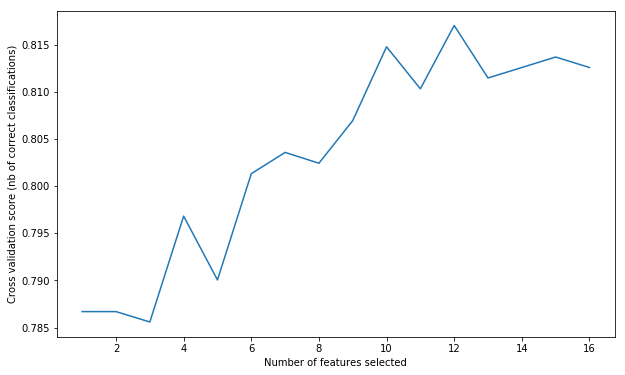

In [45]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(x, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(x.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()


In [46]:
cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked', 'Title', 'AgeC', 'FamilySize', 'NameLength', 'FareC', 'NoCabin', 'Pair'] 
X = titanic[cols]
Y = titanic['Survived']


In [55]:
#train model#
logmodel = LogisticRegression()
logmodel.fit(X,Y)
#cross validation#
score=cross_val_score(logmodel,X,Y, cv=10)  


In [56]:
score

array([0.81111111, 0.83333333, 0.76404494, 0.86516854, 0.83146067,
       0.76404494, 0.82022472, 0.83146067, 0.85393258, 0.80681818])

In [57]:
mean_score=np.mean(score)

In [58]:
mean_score

0.8181599704914312

In [62]:
x_titanic_test = titanic_test[cols]


In [60]:
y_titanic_test=logmodel.predict(x_titanic_test)

roc_auc= 0.806682005560349


Text(0.5,1,'Receiver Operating Characteristic Curve')

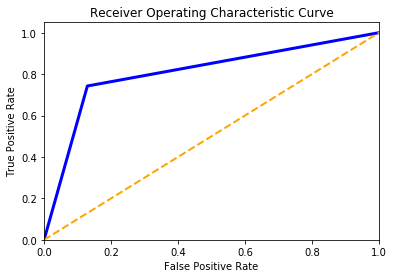

In [61]:
y_score=logmodel.predict(X)
fpr, tpr, _ = sk.metrics.roc_curve(Y, y_score)
roc_auc=auc(fpr,tpr)
print('roc_auc=',roc_auc)
plt.plot(fpr,tpr,color='blue',lw=3,label='ROC_Curve')
plt.plot([0,1],[0,1],color='orange',lw=2,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')